Liczba pomiarów to: 10


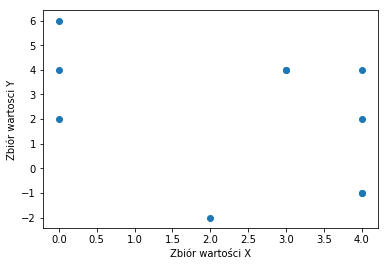

,X,Y
0,4,4
1,2,-2
2,4,-1
3,0,6
4,3,4
5,0,4
6,4,2
7,0,2
8,4,-1
9,3,4


In [80]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import random
wartosc_MIN = -2
wartosc_MAX = 7
liczba_pomiarow = 10

print("Liczba pomiarów to:", liczba_pomiarow)
df = pd.DataFrame()
df['X'] = [random.randrange(wartosc_MIN, wartosc_MAX,1) for i in range(liczba_pomiarow)]
df['Y'] = [random.randrange(wartosc_MIN, wartosc_MAX,1) for i in range(liczba_pomiarow)]


plt.scatter(df['X'], df['Y'])
plt.xlabel('Zbiór wartości X')
plt.ylabel('Zbiór wartosci Y')
plt.show()

df


In [81]:
from math import sqrt
def srednia(zbior):
    return int(zbior.sum()) / len(zbior)

Mx = round(srednia(df['X']),2)
My = round(srednia(df['Y']),2)

print("Średnia wartość wygenerowanego zbioru X-ów:\n",Mx)
print("Średnia wartość wygenerowanego zbioru Y-ów:\n",My,"\n")
print("------------------------------------------------------------------------------------------------------\n")
print ("Odchylenie standardowe próby, czyli o ile średnio elementy zbioru, różnią się od średniej tego zbioru.")

def odchylenie(zbior, srednia):
    g = 0
    for l in zbior:
        g += (l - srednia) * (l - srednia)
    return sqrt(g / (len(zbior) - 1))

Sx = round(odchylenie(df['X'], Mx),2)
Sy = round(odchylenie(df['Y'], My),2)



print("Sx:", Sx)
print("Sy:", Sy,"\n")

print("------------------------------------------------------------------------------------------------------\n")
print ("Współczynnik korelacji Pearsona:\n")

n = len(df['X'])
vr = pd.DataFrame(df[:])
vr['y2'] = df['Y'] * df['Y']
vr['xy'] = df['X'] * df['Y']
vr['x2'] = df['X'] * df['X']
vr['y2'] = df['Y'] * df['Y']
vr.loc['Σ'] = vr.sum()

print("n = ", n)
print()
print(vr)

def wsp_korelacji_pearsona(n, ΣX, ΣY, Σxy, Σx2, Σy2):
    return ( (n * Σxy - ΣX * ΣY) /
             (sqrt((n * Σx2 - ΣX**2) * (n * Σy2 - ΣY**2))) )

r = round(wsp_korelacji_pearsona(n, vr['X']['Σ'], vr['Y']['Σ'], vr['xy']['Σ'], vr['x2']['Σ'], vr['y2']['Σ']),2)
print("\nWspółczynnik wynosi = ", r," wynik jest zaokrąglony do dwóch miejsc po przecinku.")



Średnia wartość wygenerowanego zbioru X-ów:
 2.4
Średnia wartość wygenerowanego zbioru Y-ów:
 2.2 

------------------------------------------------------------------------------------------------------

Odchylenie standardowe próby, czyli o ile średnio elementy zbioru, różnią się od średniej tego zbioru.
Sx: 1.78
Sy: 2.7 

------------------------------------------------------------------------------------------------------

Współczynnik korelacji Pearsona:

n =  10

    X   Y   y2  xy  x2
0   4   4   16  16  16
1   2  -2    4  -4   4
2   4  -1    1  -4  16
3   0   6   36   0   0
4   3   4   16  12   9
5   0   4   16   0   0
6   4   2    4   8  16
7   0   2    4   0   0
8   4  -1    1  -4  16
9   3   4   16  12   9
Σ  24  22  114  36  86

Współczynnik wynosi =  -0.39  wynik jest zaokrąglony do dwóch miejsc po przecinku.


Obliczenie najlepiej pasującej linii:

b =  -0.59
a =  3.62


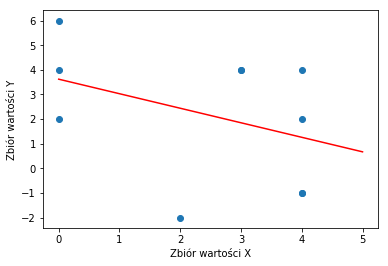

In [82]:
import numpy as np
print("Obliczenie najlepiej pasującej linii:\n")
b = round(r * (Sy / Sx),2)
a = round(My - (b * Mx),2)
print("b = ", b)
print("a = ", a)

def najlepiej_pasujaca_linia(x):
    return (b * x) + a

x = np.linspace(0, 5, 1000)
plt.scatter(df['X'], df['Y'])
plt.plot(x, najlepiej_pasujaca_linia(x), 'r')
plt.xlabel('Zbiór wartości X')
plt.ylabel('Zbiór wartości Y')
plt.show()